In [88]:
import pandas as pd
import numpy as np
import glob

In [91]:
!ls

 inventory.csv	        states0.csv   states3.csv   states6.csv   states9.csv
'Pandas assign.ipynb'   states1.csv   states4.csv   states7.csv
 README.md	        states2.csv   states5.csv   states8.csv


In [126]:
!pwd

/home/fawad/Desktop/PIAIC AI Course/Assignments PIAIC/Pandas Assignment


In [127]:
###################1.The first visualization your boss wants you to make is a scatterplot that shows average income in a state vs proportion of women in that state. Open some of the census csv files in the navigator. How are they named? What kind of information do they hold? Will they help us make this graph?


In [131]:
state0=pd.read_csv('/home/fawad/Desktop/PIAIC AI Course/Assignments PIAIC/Pandas Assignment/states0.csv')
state1=pd.read_csv('/home/fawad/Desktop/PIAIC AI Course/Assignments PIAIC/Pandas Assignment/states1.csv')
state2=pd.read_csv('/home/fawad/Desktop/PIAIC AI Course/Assignments PIAIC/Pandas Assignment/states2.csv')
print(state0, state1, state2)

   Unnamed: 0       State  TotalPop             Hispanic                White  \
0           0     Alabama   4830620  3.7516156462584975%     61.878656462585%   
1           1      Alaska    733375   5.909580838323351%  60.910179640718574%   
2           2     Arizona   6641928  29.565921052631502%  57.120000000000026%   
3           3    Arkansas   2958208   6.215474452554738%   71.13781021897813%   
4           4  California  38421464  37.291874687968054%   40.21578881677474%   
5           5    Colorado   5278906   20.78438003220608%   69.89557165861504%   

                 Black                Native                Asian  \
0   31.25297619047618%   0.4532312925170065%  1.0502551020408146%   
1  2.8485029940119775%    16.39101796407186%   5.450299401197604%   
2  3.8509868421052658%     4.35506578947368%   2.876578947368419%   
3  18.968759124087573%   0.5229197080291965%  1.1423357664233578%   
4   5.677396405391911%  0.40529206190713685%  13.052234148776776%   
5   3.546376811594

In [ ]:
###################2.It will be easier to inspect this data once we have it in a DataFrame. You can’t even call .head() on these csvs! How are you supposed to read them? Using glob, loop through the census files available and load them into DataFrames. Then, concatenate all of those DataFrames together into one DataFrame, called something like us_census.

In [94]:
us_census = pd.DataFrame([])

for csv_file in glob.glob('/home/fawad/Desktop/PIAIC AI Course/Assignments PIAIC/Pandas Assignment/states*'):
   us_census = pd.concat( ( us_census , pd.read_csv(str(csv_file)) ) , ignore_index = True)
us_census.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,Colorado,5278906,20.78438003220608%,69.89557165861504%,3.546376811594201%,0.5738325281803548%,2.661996779388082%,NaN,$64657.801787164906,2648667M_2630239F
1,1,Connecticut,3593222,15.604830917874388%,67.6770531400966%,10.34806763285027%,0.12620772946859898%,4.021980676328502%,0.018599033816425123%,$76146.5605875153,1751607M_1841615F
2,2,Delaware,926454,8.82476635514019%,64.63271028037383%,20.743925233644834%,0.25981308411214965%,3.2686915887850483%,NaN,$61827.97663551402,448413M_478041F
3,3,District of Columbia,647484,9.165921787709499%,33.103910614525134%,51.77653631284915%,0.20055865921787713%,3.3832402234636865%,0.029608938547486034%,$75466.36363636363,306674M_340810F
4,4,Florida,19645772,21.3385426653884%,59.08374880153398%,15.165675934803444%,0.2104506232023015%,2.2831735378715257%,0.05151006711409391%,$50690.194986743794,9600009M_10045763F


In [132]:
us_census = us_census.drop(us_census.columns[0], axis = 1)

In [ ]:
################## 3.Look at the .columns and the .dtypes of the us_census DataFrame. Are those datatypes going to hinder you as you try to make histograms?

In [96]:
print(us_census.shape)
print(us_census.dtypes)

(60, 10)
State        object
TotalPop      int64
Hispanic     object
White        object
Black        object
Native       object
Asian        object
Pacific      object
Income       object
GenderPop    object
dtype: object


In [97]:
us_census.columns.values

array(['State', 'TotalPop', 'Hispanic', 'White', 'Black', 'Native',
       'Asian', 'Pacific', 'Income', 'GenderPop'], dtype=object)

In [136]:
us_census.isnull().sum()

TotalPop     0
Hispanic     0
White        0
Black        0
Native       0
Asian        0
Pacific      4
Income       0
GenderPop    0
Men          0
Women        2
dtype: int64

In [ ]:
#################6.Look at the GenderPop column. We are going to want to separate this into two columns, the Men column, and the Women column. Split the column into those two new columns using str.split and separating out those results.

In [134]:

us_census[["Men","Women"]]=us_census.GenderPop.str.split("_",expand=True)
print(us_census['Men'].head())
us_census["Men"]=us_census["Men"].str.replace('M','')
#print(us_census.head())
us_census["Women"]=us_census["Women"].str.replace('F','')
#print(us_census.head())

0    2648667M
1    1751607M
2     448413M
3     306674M
4    9600009M
Name: Men, dtype: object


In [ ]:
################4.Look at the .head() of the DataFrame so that you can understand why some of these dtypes are objects instead of integers or floats. Start to make a plan for how to convert these columns into the right types for manipulation. Regex to the Rescue

In [137]:
print(us_census.head())

   TotalPop   Hispanic      White      Black    Native     Asian   Pacific  \
0   5278906  20.784380  69.895572   3.546377  0.573833  2.661997       NaN   
1   3593222  15.604831  67.677053  10.348068  0.126208  4.021981  0.018599   
2    926454   8.824766  64.632710  20.743925  0.259813  3.268692       NaN   
3    647484   9.165922  33.103911  51.776536  0.200559  3.383240  0.029609   
4  19645772  21.338543  59.083749  15.165676  0.210451  2.283174  0.051510   

         Income           GenderPop      Men       Women  
0  64657.801787   2648667M_2630239F  2648667   2630239.0  
1  76146.560588   1751607M_1841615F  1751607   1841615.0  
2  61827.976636     448413M_478041F   448413    478041.0  
3  75466.363636     306674M_340810F   306674    340810.0  
4  50690.194987  9600009M_10045763F  9600009  10045763.0  


In [ ]:
#################7.Convert both of the columns into numerical datatypes. There is still an M or an F character in each entry! We should remove those before we convert.

In [135]:
us_census['Men'] = pd.to_numeric(us_census['Men'])
us_census['Women'] = pd.to_numeric(us_census['Women'])
print(us_census.head())

   TotalPop   Hispanic      White      Black    Native     Asian   Pacific  \
0   5278906  20.784380  69.895572   3.546377  0.573833  2.661997       NaN   
1   3593222  15.604831  67.677053  10.348068  0.126208  4.021981  0.018599   
2    926454   8.824766  64.632710  20.743925  0.259813  3.268692       NaN   
3    647484   9.165922  33.103911  51.776536  0.200559  3.383240  0.029609   
4  19645772  21.338543  59.083749  15.165676  0.210451  2.283174  0.051510   

         Income           GenderPop      Men       Women  
0  64657.801787   2648667M_2630239F  2648667   2630239.0  
1  76146.560588   1751607M_1841615F  1751607   1841615.0  
2  61827.976636     448413M_478041F   448413    478041.0  
3  75466.363636     306674M_340810F   306674    340810.0  
4  50690.194987  9600009M_10045763F  9600009  10045763.0  


In [ ]:
#################5.Use regex to turn the Income column into a format that is ready for conversion into a numerical type.

In [103]:

#https://kanoki.org/2019/11/12/how-to-use-regex-in-pandas/
#https://www.w3schools.com/python/python_regex.asp
import re
us_census['Income'] = us_census.Income.str.replace('$','',regex=True)
us_census.head()

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,Men,Women
0,Colorado,5278906,20.78438003220608%,69.89557165861504%,3.546376811594201%,0.5738325281803548%,2.661996779388082%,NaN,64657.801787164906,2648667M_2630239F,2648667,2630239.0
1,Connecticut,3593222,15.604830917874388%,67.6770531400966%,10.34806763285027%,0.12620772946859898%,4.021980676328502%,0.018599033816425123%,76146.5605875153,1751607M_1841615F,1751607,1841615.0
2,Delaware,926454,8.82476635514019%,64.63271028037383%,20.743925233644834%,0.25981308411214965%,3.2686915887850483%,NaN,61827.97663551402,448413M_478041F,448413,478041.0
3,District of Columbia,647484,9.165921787709499%,33.103910614525134%,51.77653631284915%,0.20055865921787713%,3.3832402234636865%,0.029608938547486034%,75466.36363636363,306674M_340810F,306674,340810.0
4,Florida,19645772,21.3385426653884%,59.08374880153398%,15.165675934803444%,0.2104506232023015%,2.2831735378715257%,0.05151006711409391%,50690.194986743794,9600009M_10045763F,9600009,10045763.0


In [139]:
us_census['Income'] = pd.to_numeric(us_census['Income'])
print(us_census.shape)
print(us_census.dtypes)

(51, 11)
TotalPop       int64
Hispanic     float64
White        float64
Black        float64
Native       float64
Asian        float64
Pacific      float64
Income       float64
GenderPop     object
Men            int64
Women        float64
dtype: object


In [ ]:
################8.Now you should have the columns you need to make the graph and make sure your boss does not slam a ruler angrily on your desk because you’ve wasted your whole day cleaning your data with no results to show!Use matplotlib to make a scatterplot! plt.scatter(the_women_column, the_income_column)  Remember to call plt.show() to see the graph!
################9.Did you get an error? These monstrous csv files probably have nan values in them! Print out your column with the number of women per state to see. We can fill in those nans by using pandas’ .fillna() function. You have the TotalPop per state, and you have the Men per state. As an estimate for the nan values in the Women column, you could use the TotalPop of that state minus the Men for that state. 
#Print out the Women column after filling the nan values to see if it worked!


In [143]:

us_census['TotalPop'] = pd.to_numeric(us_census['TotalPop'])
x=us_census.TotalPop-us_census.Men
print(x)

us_census.Women.fillna((us_census.TotalPop-us_census.Men),inplace=True)
us_census['Women']

0      2630239
1      1841615
2       478041
3       340810
4     10045763
5      5123362
6       543273
7      2455167
8       419713
9      3331859
10    13367298
11     1444150
13      696428
14      806083
15     6556862
16     3333382
17     1558931
18     3057895
19     3455936
20     5038598
21     2727005
22     1536358
23     3081445
25     1453125
26     2233145
27     2364097
28      679019
30     4561386
31     1051703
32    10131373
33     5049925
34      353677
35     5913084
37      318031
38     4195682
39     3497739
40      937789
41     2890732
43     1942789
44     1990780
45     6534215
46     1869213
49      504536
50      939759
51     1390901
52      670717
54     2489527
55      349215
56     3342840
57     1506295
58    19334329
dtype: int64


0      2630239.0
1      1841615.0
2       478041.0
3       340810.0
4     10045763.0
5      5123362.0
6       543273.0
7      2455167.0
8       419713.0
9      3331859.0
10    13367298.0
11     1444150.0
13      696428.0
14      806083.0
15     6556862.0
16     3333382.0
17     1558931.0
18     3057895.0
19     3455936.0
20     5038598.0
21     2727005.0
22     1536358.0
23     3081445.0
25     1453125.0
26     2233145.0
27     2364097.0
28      679019.0
30     4561386.0
31     1051703.0
32    10131373.0
33     5049925.0
34      353677.0
35     5913084.0
37      318031.0
38     4195682.0
39     3497739.0
40      937789.0
41     2890732.0
43     1942789.0
44     1990780.0
45     6534215.0
46     1869213.0
49      504536.0
50      939759.0
51     1390901.0
52      670717.0
54     2489527.0
55      349215.0
56     3342840.0
57     1506295.0
58    19334329.0
Name: Women, dtype: float64

In [144]:
us_census.Women.isnull().sum()

0

In [ ]:
###################10.We forgot to check for duplicates! Use .duplicated() on your census DataFrame to see if we have duplicate rows in there.



In [145]:
us_census.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
25    False
26    False
27    False
28    False
30    False
31    False
32    False
33    False
34    False
35    False
37    False
38    False
39    False
40    False
41    False
43    False
44    False
45    False
46    False
49    False
50    False
51    False
52    False
54    False
55    False
56    False
57    False
58    False
dtype: bool

In [146]:
##################11.Drop those duplicates using the .drop_duplicates() function.

In [147]:
us_census=us_census.drop_duplicates()

In [ ]:
###################12.Make the scatterplot again. Now, it should be perfect! Your job is secure, for now.

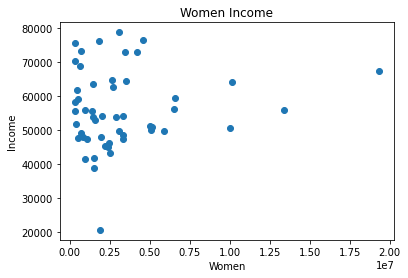

In [109]:
import matplotlib.pyplot as plt
plt.scatter(us_census.Women, us_census.Income)
plt.xlabel('Women')
plt.ylabel('Income')
plt.title("Women Income")
plt.show()

In [148]:
us_census.columns
print(us_census.dtypes)

TotalPop       int64
Hispanic     float64
White        float64
Black        float64
Native       float64
Asian        float64
Pacific      float64
Income       float64
GenderPop     object
Men            int64
Women        float64
dtype: object


In [ ]:
#########################14.Try to make a histogram for each one!You will have to get the columns into numerical format, and those percentage signs will have to go. Don’t forget to fill the nan values with something that makes sense! You probably dropped the duplicate rows when making your last graph, but it couldn’t hurt to check for duplicates again.

In [149]:
#https://www.geeksforgeeks.org/indexing-and-selecting-data-with-pandas/
us_census.loc[:,['Hispanic','White', 'Black', 'Native', 'Asian','Pacific']] = us_census.loc[:,['Hispanic','White', 'Black', 'Native', 'Asian','Pacific']].replace('%','',regex=True)
us_census.iloc[:, 2:8]
us_census.iloc[:, 2:8]=(us_census.iloc[:, 2:8]).astype(float)
us_census.dtypes

TotalPop       int64
Hispanic     float64
White        float64
Black        float64
Native       float64
Asian        float64
Pacific      float64
Income       float64
GenderPop     object
Men            int64
Women        float64
dtype: object

In [ ]:
###################13. Now, your boss wants you to make a bunch of histograms out of the race data that you have. Look at the .columns again to see what the race categories are.

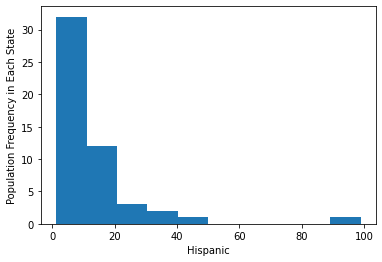

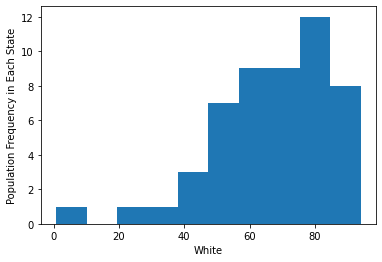

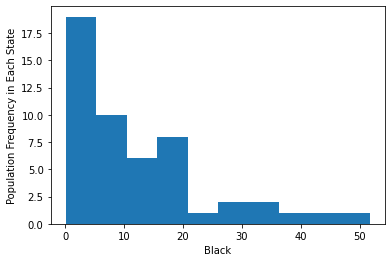

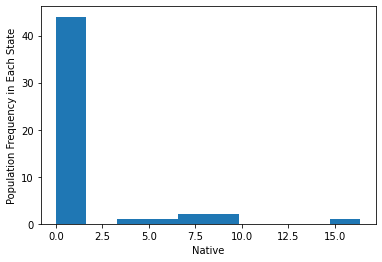

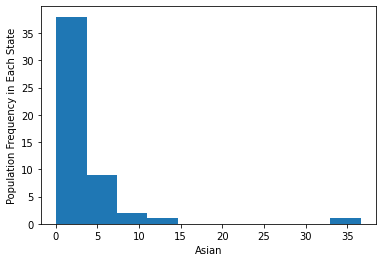

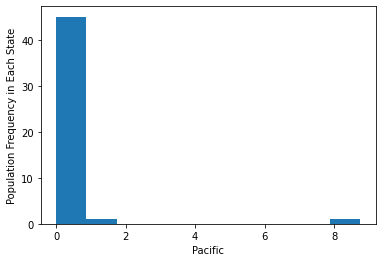

In [112]:
#https://stackoverflow.com/questions/11285613/selecting-multiple-columns-in-a-pandas-dataframe
#plt.hist(us_census['Hispanic'],bins = 10)
#plt.ylabel('Population Frequency in Each State')
#plt.xlabel('Hispanic')
#plt.show() 
#print(us_census.iloc[:, 2:8])
#for column in us_census.loc[2:8]:
#plt.figure(figsize=(20,10))
#plt.bar(us_census.State,us_census.iloc[:, 2:8])
#plt.xticks(rotation=90)
#plt.show()

for race in us_census.iloc[:, 2:8]:
        plt.figure()
        plt.hist(us_census.iloc[:, 2:8][race],bins = 10)
        plt.ylabel('Population Frequency in Each State')
        plt.xlabel(race)
        plt.show() 

In [150]:
us_census.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
25    False
26    False
27    False
28    False
30    False
31    False
32    False
33    False
34    False
35    False
37    False
38    False
39    False
40    False
41    False
43    False
44    False
45    False
46    False
49    False
50    False
51    False
52    False
54    False
55    False
56    False
57    False
58    False
dtype: bool

In [ ]:
##################15. Phew. You’ve definitely impressed your boss on your first day of work. But is there a way you really convey the power of pandas and Python over the drudgery of csv and Excel? Try to make some more interesting graphs to show your boss, and the world! You may need to clean the data even more to do it, or the cleaning you have already done may give you the ease of manipulation you’ve been searching for.

In [114]:
TotalPop=us_census['TotalPop']
Income=us_census['Income']

Men=us_census['Men']
Women=us_census['Women']

<Figure size 432x288 with 0 Axes>

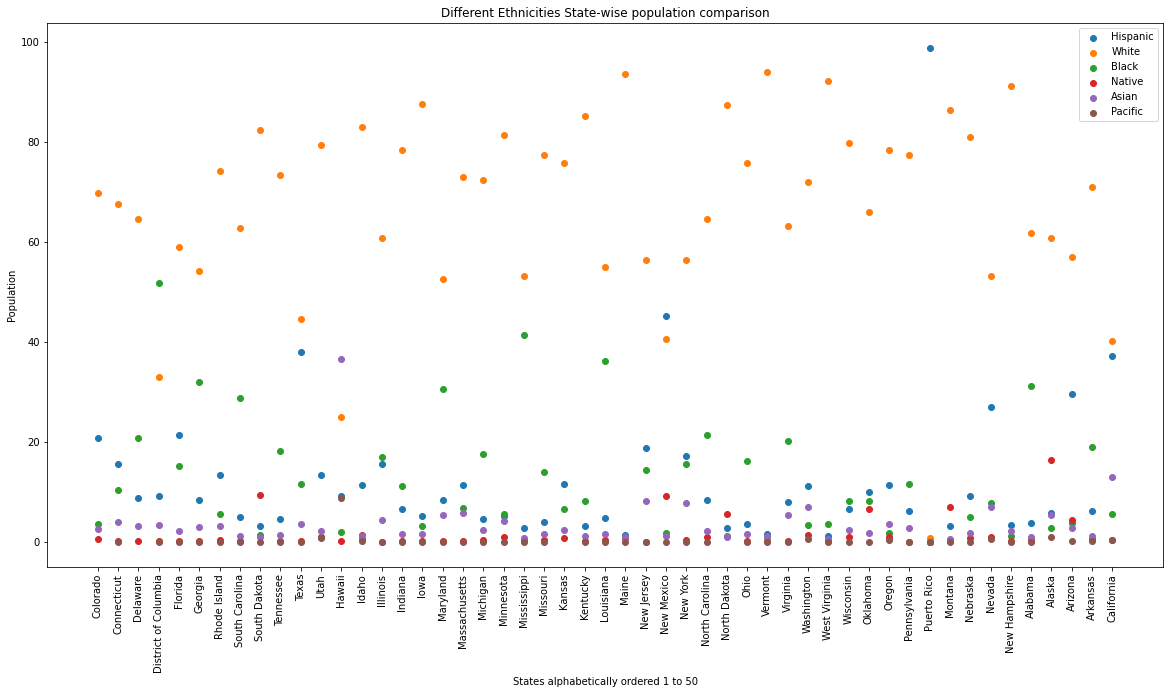

In [115]:
Hispanic=us_census['Hispanic']
White=us_census['White']
Black=us_census['Black']
Native=us_census['Native']
Asian=us_census['Asian']
Pacific=us_census['Pacific']
us_census['State']

plt.clf()
plt.figure(figsize=(20,10))
plt.scatter(us_census['State'],Hispanic, label = 'Hispanic')
plt.scatter(us_census['State'],White, label = 'White')
plt.scatter(us_census['State'],Black, label = 'Black')
plt.scatter(us_census['State'],Native, label = 'Native')
plt.scatter(us_census['State'],Asian, label = 'Asian')
plt.scatter(us_census['State'],Pacific, label = 'Pacific')
plt.title('Different Ethnicities State-wise population comparison')
plt.xlabel('States alphabetically ordered 1 to 50')
plt.ylabel('Population')
plt.legend()
plt.xticks(rotation=90)
plt.show() 

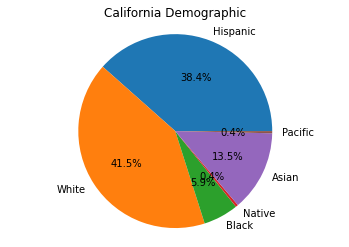

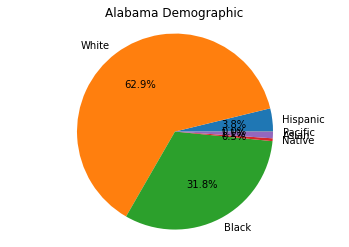

In [116]:
States=us_census['State']
#print(States)
def piechart(state):
    states=us_census[States == state]
    Ethnicities=states.columns[2:8]
    Populations = states.values[:, 2:8].reshape(6,)
    plt.pie(Populations, labels = Ethnicities ,autopct='%1.1f%%')
    plt.title(state+' '+'Demographic')
    plt.axis('equal')
    plt.show()
    
piechart('California')
piechart('Alabama')

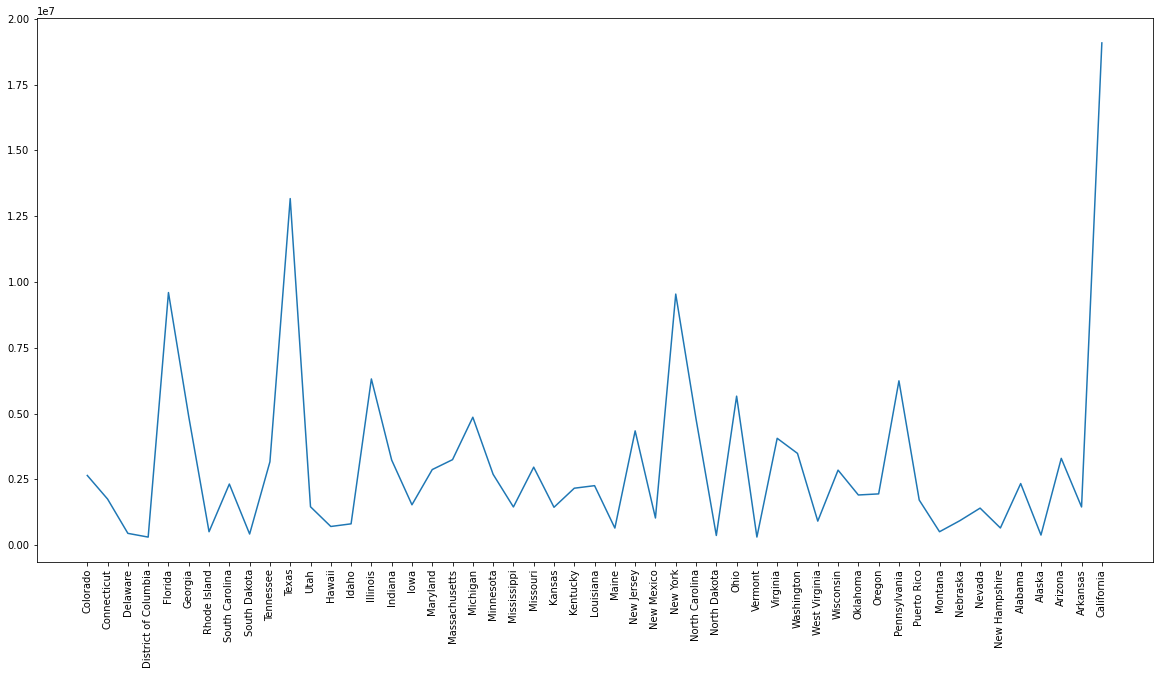

In [117]:
plt.figure(figsize=(20,10))
plt.plot(States, Men)
plt.xticks(rotation=90)
plt.show()

In [118]:
###################   PART 2:   LEARN DATA ANALYSIS WITH PANDAS (Petal Power Inventory)   #########################

In [155]:
inventory = pd.read_csv("inventory.csv")
inventory.head(10)

,location,product_type,product_description,quantity,price
0,Staten Island,seeds,daisy,4,6.99
1,Staten Island,seeds,calla lily,46,19.99
2,Staten Island,seeds,tomato,85,13.99
3,Staten Island,garden tools,rake,4,13.99
4,Staten Island,garden tools,wheelbarrow,0,89.99
5,Staten Island,garden tools,spade,93,19.99
6,Staten Island,pest_control,insect killer,74,12.99
7,Staten Island,pest_control,weed killer,8,23.99
8,Staten Island,planter,20 inch terracotta planter,0,17.99
9,Staten Island,planter,8 inch plastic planter,53,3.99


In [156]:
staten_island=inventory.iloc[0:10,:]
staten_island

,location,product_type,product_description,quantity,price
0,Staten Island,seeds,daisy,4,6.99
1,Staten Island,seeds,calla lily,46,19.99
2,Staten Island,seeds,tomato,85,13.99
3,Staten Island,garden tools,rake,4,13.99
4,Staten Island,garden tools,wheelbarrow,0,89.99
5,Staten Island,garden tools,spade,93,19.99
6,Staten Island,pest_control,insect killer,74,12.99
7,Staten Island,pest_control,weed killer,8,23.99
8,Staten Island,planter,20 inch terracotta planter,0,17.99
9,Staten Island,planter,8 inch plastic planter,53,3.99


In [158]:
product_request=staten_island['product_description']
seed_request=inventory[(inventory.location=='Brooklyn') & (inventory.product_type=='seeds')]
seed_request

,location,product_type,product_description,quantity,price
10,Brooklyn,seeds,daisy,50,6.99
11,Brooklyn,seeds,calla lily,0,19.99
12,Brooklyn,seeds,tomato,0,13.99


In [159]:
inventory['in_stock']=inventory['quantity']>0
inventory

,location,product_type,product_description,quantity,price,in_stock
0,Staten Island,seeds,daisy,4,6.99,True
1,Staten Island,seeds,calla lily,46,19.99,True
2,Staten Island,seeds,tomato,85,13.99,True
3,Staten Island,garden tools,rake,4,13.99,True
4,Staten Island,garden tools,wheelbarrow,0,89.99,False
5,Staten Island,garden tools,spade,93,19.99,True
6,Staten Island,pest_control,insect killer,74,12.99,True
7,Staten Island,pest_control,weed killer,8,23.99,True
8,Staten Island,planter,20 inch terracotta planter,0,17.99,False
9,Staten Island,planter,8 inch plastic planter,53,3.99,True


In [160]:
inventory['total_value']=inventory['price']*inventory['quantity']
inventory

,location,product_type,product_description,quantity,price,in_stock,total_value
0,Staten Island,seeds,daisy,4,6.99,True,27.96
1,Staten Island,seeds,calla lily,46,19.99,True,919.54
2,Staten Island,seeds,tomato,85,13.99,True,1189.15
3,Staten Island,garden tools,rake,4,13.99,True,55.96
4,Staten Island,garden tools,wheelbarrow,0,89.99,False,0.00
5,Staten Island,garden tools,spade,93,19.99,True,1859.07
6,Staten Island,pest_control,insect killer,74,12.99,True,961.26
7,Staten Island,pest_control,weed killer,8,23.99,True,191.92
8,Staten Island,planter,20 inch terracotta planter,0,17.99,False,0.00
9,Staten Island,planter,8 inch plastic planter,53,3.99,True,211.47


In [161]:
combine_lambda = lambda row: \
    '{} - {}'.format(row.product_type,
                     row.product_description)
inventory['full_description']=inventory.apply(combine_lambda, axis = 1)
inventory

,location,product_type,product_description,quantity,price,in_stock,total_value,full_description
0,Staten Island,seeds,daisy,4,6.99,True,27.96,seeds - daisy
1,Staten Island,seeds,calla lily,46,19.99,True,919.54,seeds - calla lily
2,Staten Island,seeds,tomato,85,13.99,True,1189.15,seeds - tomato
3,Staten Island,garden tools,rake,4,13.99,True,55.96,garden tools - rake
4,Staten Island,garden tools,wheelbarrow,0,89.99,False,0.00,garden tools - wheelbarrow
5,Staten Island,garden tools,spade,93,19.99,True,1859.07,garden tools - spade
6,Staten Island,pest_control,insect killer,74,12.99,True,961.26,pest_control - insect killer
7,Staten Island,pest_control,weed killer,8,23.99,True,191.92,pest_control - weed killer
8,Staten Island,planter,20 inch terracotta planter,0,17.99,False,0.00,planter - 20 inch terracotta planter
9,Staten Island,planter,8 inch plastic planter,53,3.99,True,211.47,planter - 8 inch plastic planter


In [162]:
#######################    ASSIGNMENT FOR PANDAS COMPLETED    #######################